
--- Initial Training (CIFAR-10 from Kaggle) ---
Epoch 1/20


2025-10-26 20:49:35.206469: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-10-26 20:49:35.902404: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_15464', 64 bytes spill stores, 64 bytes spill loads

2025-10-26 20:49:35.970206: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_15464', 260 bytes spill stores, 260 bytes spill loads

2025-10-26 20:49:36.060969: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_15464', 

782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 43ms/step - accuracy: 0.5161 - loss: 1.4289 - val_accuracy: 0.3303 - val_loss: 2.2978
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.7331 - loss: 0.7919 - val_accuracy: 0.7613 - val_loss: 0.6982
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.8035 - loss: 0.5799 - val_accuracy: 0.7774 - val_loss: 0.6638
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.8525 - loss: 0.4356 - val_accuracy: 0.7915 - val_loss: 0.6587
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.8871 - loss: 0.3360 - val_accuracy: 0.7908 - val_loss: 0.7097
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.9149 - loss: 0.2538 - val_accuracy: 0.7983 - val_loss: 0.7205
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.9302 - loss: 0.2126 - val_accuracy: 0.8041 - val_loss: 0.7169
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.9460 - loss: 0.1625 - val_accurac

2025-10-26 20:55:01.443122: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_14865', 8 bytes spill stores, 8 bytes spill loads



790/790 ━━━━━━━━━━━━━━━━━━━━ 72s 44ms/step - accuracy: 0.9818 - loss: 0.0588 - val_accuracy: 0.8088 - val_loss: 1.0013
790/790 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.9828 - loss: 0.0541 - val_accuracy: 0.8249 - val_loss: 0.9261
790/790 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.9863 - loss: 0.0407 - val_accuracy: 0.8224 - val_loss: 0.9274
790/790 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.9916 - loss: 0.0270 - val_accuracy: 0.8220 - val_loss: 0.9710
790/790 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.9890 - loss: 0.0375 - val_accuracy: 0.8166 - val_loss: 1.0109
Model saved as cifar10_resnet50_replay_finetuned.keras


2025-10-26 20:56:16.309663: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-10-26 20:56:16.664354: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1692', 8 bytes spill stores, 8 bytes spill loads

2025-10-26 20:56:16.914550: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1692', 20 bytes spill stores, 20 bytes spill loads

2025-10-26 20:56:16.978616: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1692', 8 bytes

157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step


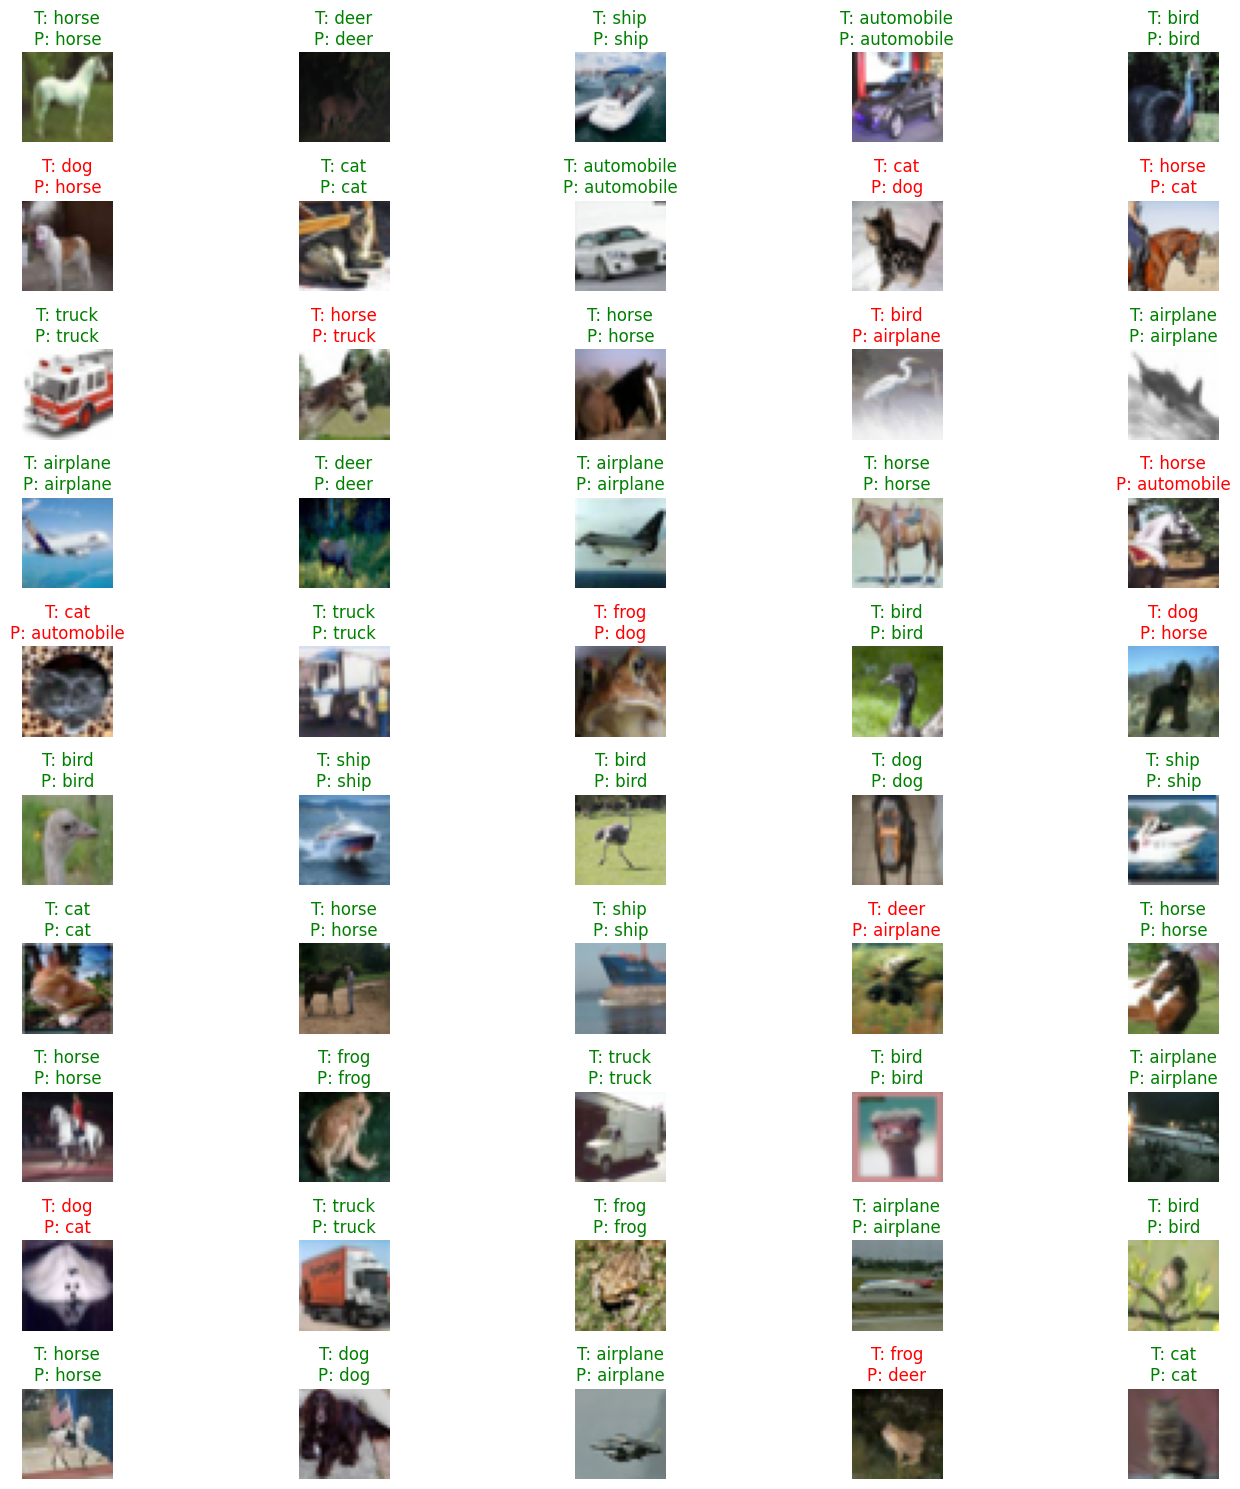

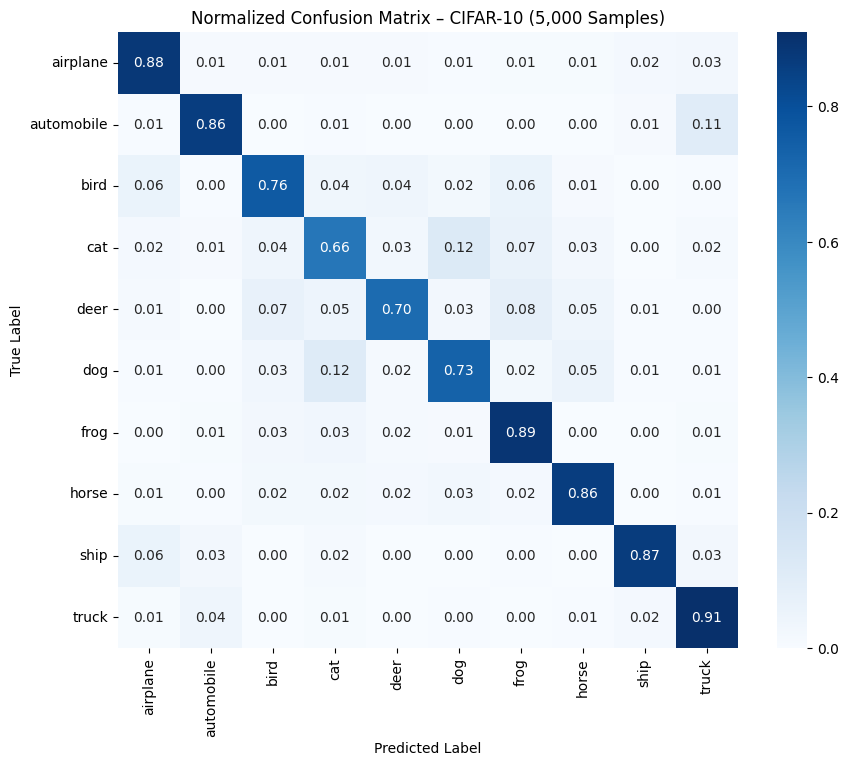

In [3]:
import os, random, pickle
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------------------------------------
# Path to Kaggle CIFAR-10 dataset
# ---------------------------------------------------------------------
KAGGLE_CIFAR10_PATH = "/home/rameyjm7/.cache/kagglehub/datasets/pankrzysiu/cifar10-python/versions/1/cifar-10-batches-py"

# ---------------------------------------------------------------------
# Replay Buffer
# ---------------------------------------------------------------------
class ReplayBuffer:
    def __init__(self, capacity=3000):
        self.buffer = []
        self.capacity = capacity

    def add_samples(self, x, y):
        if len(self.buffer) >= self.capacity:
            self.buffer = self.buffer[len(y):]
        self.buffer.extend(zip(x, y))

    def get_samples(self, batch_size=500):
        batch_size = min(batch_size, len(self.buffer))
        idx = np.random.choice(len(self.buffer), batch_size, replace=False)
        samples = [self.buffer[i] for i in idx]
        x_r, y_r = zip(*samples)
        return np.array(x_r), np.array(y_r)

# ---------------------------------------------------------------------
# Load CIFAR-10 from Kaggle
# ---------------------------------------------------------------------
def load_cifar10():
    def load_batch(fname):
        with open(os.path.join(KAGGLE_CIFAR10_PATH, fname), "rb") as f:
            batch = pickle.load(f, encoding="latin1")
        data = batch["data"].reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
        labels = np.array(batch["labels"])
        return data, labels

    x_train, y_train = [], []
    for i in range(1, 6):
        data, labels = load_batch(f"data_batch_{i}")
        x_train.append(data)
        y_train.append(labels)
    x_train = np.concatenate(x_train)
    y_train = np.concatenate(y_train)
    x_test, y_test = load_batch("test_batch")

    x_train, x_test = x_train / 255.0, x_test / 255.0
    num_classes = 10
    y_train, y_test = to_categorical(y_train, num_classes), to_categorical(y_test, num_classes)
    return x_train, y_train, x_test, y_test, num_classes

# ---------------------------------------------------------------------
# Train Base ResNet-50 Model
# ---------------------------------------------------------------------
def train_base_model():
    x_train, y_train, x_test, y_test, num_classes = load_cifar10()

    base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(32, 32, 3))
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(512, activation="relu")(x)
    x = Dropout(0.4)(x)
    x = Dense(256, activation="relu")(x)
    outputs = Dense(num_classes, activation="softmax")(x)
    model = Model(inputs=base_model.input, outputs=outputs)

    model.compile(optimizer=Adam(learning_rate=1e-4),
                  loss="categorical_crossentropy", metrics=["accuracy"])

    print("\n--- Initial Training (CIFAR-10 from Kaggle) ---")
    model.fit(x_train, y_train, validation_data=(x_test, y_test),
              epochs=20, batch_size=64, verbose=1)
    return model, x_train, y_train, x_test, y_test

# ---------------------------------------------------------------------
# Fine-Tuning with Replay Buffer + LR Decay
# ---------------------------------------------------------------------
def fine_tune(model, x_train, y_train, x_test, y_test):
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=1e-4, decay_steps=10000, decay_rate=0.9
    )
    model.compile(optimizer=Adam(learning_rate=lr_schedule),
                  loss="categorical_crossentropy", metrics=["accuracy"])

    buffer = ReplayBuffer(capacity=3000)
    buffer.add_samples(x_train[:10000], y_train[:10000])

    print("\n--- Fine-Tuning with Replay Buffer ---")
    for epoch in range(5):
        x_r, y_r = buffer.get_samples(batch_size=500)
        x_combined = np.concatenate([x_train, x_r])
        y_combined = np.concatenate([y_train, y_r])
        model.fit(x_combined, y_combined, epochs=1, batch_size=64,
                  verbose=1, validation_data=(x_test, y_test))
    return model

# ---------------------------------------------------------------------
# Run Training + Fine-Tuning
# ---------------------------------------------------------------------
trained_model, x_train, y_train, x_test, y_test = train_base_model()
trained_model = fine_tune(trained_model, x_train, y_train, x_test, y_test)

# ---------------------------------------------------------------------
# Save Model (.keras)
# ---------------------------------------------------------------------
model_filename = "cifar10_resnet50_replay_finetuned.keras"
trained_model.save(model_filename)
print(f"Model saved as {model_filename}")

# ---------------------------------------------------------------------
# Evaluation (5k subset + 50 predictions + confusion matrix)
# ---------------------------------------------------------------------
cifar10_labels = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

subset_idx = np.random.choice(len(x_test), 5000, replace=False)
x_subset = x_test[subset_idx]
y_true_subset = np.argmax(y_test[subset_idx], axis=1)
y_pred_subset = np.argmax(trained_model.predict(x_subset), axis=1)

# 50 Random Predictions
indices = random.sample(range(len(x_subset)), 50)
plt.figure(figsize=(15, 15))
for i, idx in enumerate(indices):
    img = x_subset[idx]
    true_label = cifar10_labels[y_true_subset[idx]]
    pred_label = cifar10_labels[y_pred_subset[idx]]
    plt.subplot(10, 5, i + 1)
    plt.imshow(img)
    plt.axis("off")
    color = "green" if true_label == pred_label else "red"
    plt.title(f"T: {true_label}\nP: {pred_label}", color=color)
plt.tight_layout()
plt.show()

# Confusion Matrix (Normalized)
cm = confusion_matrix(y_true_subset, y_pred_subset, labels=np.arange(10))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10, 8))
sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=cifar10_labels, yticklabels=cifar10_labels)
plt.title("Normalized Confusion Matrix – CIFAR-10 (5,000 Samples)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
